In [3]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("iot_telemetry_data.csv")
data.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000


In [6]:
from sklearn.preprocessing import LabelEncoder

encLab = LabelEncoder()
deviceEnc = pd.DataFrame(encLab.fit_transform(data['device']), columns=['device_condition'])
deviceEnc.index = data.index

dataEnc = pd.concat([data, deviceEnc], axis=1)
dataEnc.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,device_condition
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,2
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,2
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,1
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,2


In [7]:
encLab2 = LabelEncoder()
lightEnc = pd.DataFrame(encLab2.fit_transform(dataEnc['light']), columns=['lights'])
lightEnc.index = dataEnc.index

dataEnc2 = pd.concat([dataEnc, lightEnc], axis=1)
dataEnc2.head()

,ts,device,co,humidity,light,lpg,motion,smoke,temp,device_condition,lights
0,1.594512e+09,b8:27:eb:bf:9d:51,0.004956,51.000000,False,0.007651,False,0.020411,22.700000,2,0
1,1.594512e+09,00:0f:00:70:91:0a,0.002840,76.000000,False,0.005114,False,0.013275,19.700001,0,0
2,1.594512e+09,b8:27:eb:bf:9d:51,0.004976,50.900000,False,0.007673,False,0.020475,22.600000,2,0
3,1.594512e+09,1c:bf:ce:15:ec:4d,0.004403,76.800003,True,0.007023,False,0.018628,27.000000,1,1
4,1.594512e+09,b8:27:eb:bf:9d:51,0.004967,50.900000,False,0.007664,False,0.020448,22.600000,2,0


In [8]:
dataProcessed = dataEnc2.drop(['device', 'light'], axis=1)
dataProcessed.head()

,ts,co,humidity,lpg,motion,smoke,temp,device_condition,lights
0,1.594512e+09,0.004956,51.000000,0.007651,False,0.020411,22.700000,2,0
1,1.594512e+09,0.002840,76.000000,0.005114,False,0.013275,19.700001,0,0
2,1.594512e+09,0.004976,50.900000,0.007673,False,0.020475,22.600000,2,0
3,1.594512e+09,0.004403,76.800003,0.007023,False,0.018628,27.000000,1,1
4,1.594512e+09,0.004967,50.900000,0.007664,False,0.020448,22.600000,2,0


In [9]:
data_limpia_input = dataProcessed.copy()
removedCol = ['lpg', 'smoke', 'co']

data_limpia = data_limpia_input.drop(removedCol, axis=1)
data_limpia.head()

,ts,humidity,motion,temp,device_condition,lights
0,1.594512e+09,51.000000,False,22.700000,2,0
1,1.594512e+09,76.000000,False,19.700001,0,0
2,1.594512e+09,50.900000,False,22.600000,2,0
3,1.594512e+09,76.800003,False,27.000000,1,1
4,1.594512e+09,50.900000,False,22.600000,2,0


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [28]:
X_cols = list(set(data_limpia.columns)-set(['ts','device_condition','motion']))
y_cols = ['device_condition']

X = data_limpia[X_cols].values
y = data_limpia[y_cols].values

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)


In [45]:
modelo_ridge = Ridge(alpha=6).fit(X_train, y_train)

In [46]:
X_test

array([[-0.44091891,  2.35181755,  1.61269072],
       [-0.76643759, -0.24236622, -0.6200817 ],
       [ 0.43886129,  2.05533966,  1.61269072],
       ...,
       [-0.44971658,  0.90648658,  1.61269072],
       [ 1.52099121, -1.24297993, -0.6200817 ],
       [-0.93359569,  2.61123624,  1.61269072]])

In [47]:
y_predict_ridge = modelo_ridge.predict(X_test)
y_predict_ridge 

array([[ 0.38572588],
       [ 0.71762297],
       [-0.38936783],
       ...,
       [ 0.22388142],
       [-1.32452708],
       [ 0.83071433]])

In [48]:
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

ridge_loss = mean_squared_error(y_test, y_predict_ridge)
r2 = metrics.r2_score(y_test, y_predict_ridge)
rmse_ridge = mean_squared_error(y_test, y_predict_ridge, squared = False)

print('Coeficiente de Determinacion R2 = ',r2)
print('Error Cuadratico Medio (Mean Squared Error - MSE) = ',ridge_loss)
print('Raiz Cuadrada del Error Cuadratico Medio (RMSE) = ',rmse_ridge)


Coeficiente de Determinacion R2 =  0.8232370928377379
Error Cuadratico Medio (Mean Squared Error - MSE) =  0.1765171957315833
Raiz Cuadrada del Error Cuadratico Medio (RMSE) =  0.4201394955625849


<p><center><font color='black' size = '5'>Modelo de RidgeCV</font></center></p>

In [34]:
n_alfas = 1000 # numero de alfas obtenidos

In [35]:
for i in np.logspace(10, -2, n_alfas):
    print(i)# 10^(seq), donde seq es un rango de 100 datos 10 a -2 

10000000000.0
9727203192.450558
9461848194.721992
9203731996.61823
8952657125.996382
8708431497.690723
8470868266.55742
8239785684.528511
8015006961.565413
7796360130.405221
7583677914.99719
7376797602.527746
7175560918.936921
6979813907.8306675
6789406812.696098
6604193962.330305
6424033659.394204
6248788072.006888
6078323128.297236
5912508413.831869
5751217071.841614
5594325706.169389
5441714286.865888
5293266058.360567
5148867450.137487
5008407989.848212
4871780218.794641
4738879609.717651
4609604486.828439
4483855948.021182
4361537789.208006
4242556430.717786
4126820845.702952
4014242490.499326
3904735236.8855557
3798215306.1907363
3694601205.19931
3593813663.8046255
3495775574.363279
3400411932.7037024
3307649780.7442427
3217418150.6763783
3129648010.6707506
3044272212.064306
2961225437.9880314
2880444153.396298
2801866556.459201
2725432531.281028
2651083601.9085417
2578762887.593798
2508415059.277541
2439986297.2595553
2373424250.023866
2308677994.187172
2245697995.5397716
218443

In [36]:
modelo_ridgeCV = RidgeCV(alphas=np.logspace(-10,2,n_alfas)).fit(X_train, y_train)

In [37]:
alphas = modelo_ridgeCV.alphas
coefs = []

for alpha in alphas:
    modelo_temp = Ridge(alpha=alpha, fit_intercept=True)
    modelo_temp.fit(X, y)
    coefs.append(modelo_temp.coef_.flatten())

In [38]:
# Mejor valor alpha encontrado
# ==============================================================================
print(f"Mejor valor de alpha encontrado: {modelo_ridgeCV.alpha_}")

Mejor valor de alpha encontrado: 6.12049837247669


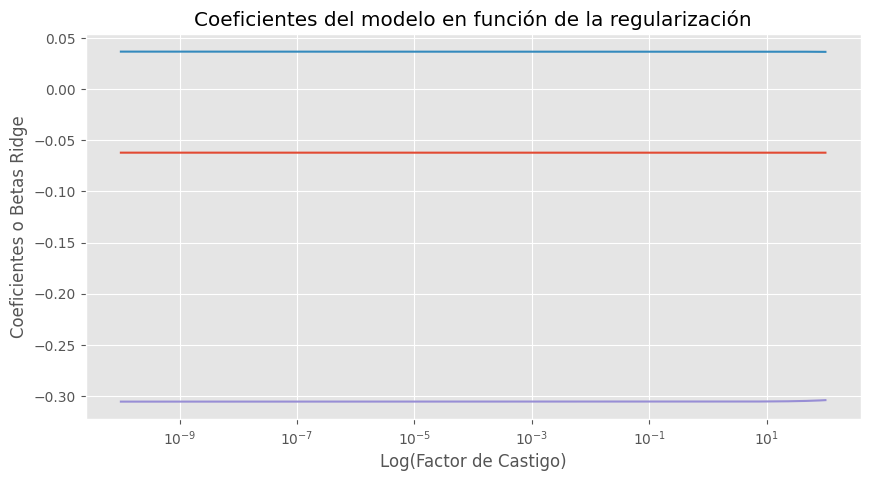

In [39]:
plt.style.use('ggplot')
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlabel('Log(Factor de Castigo)')
ax.set_ylabel('Coeficientes o Betas Ridge')
ax.set_title('Coeficientes del modelo en función de la regularización');
plt.axis('tight')
plt.show()

In [40]:
modelo_ridge = RidgeCV(
            alphas          = 6.1,
            fit_intercept   = True,
            store_cv_values = True
         )

_ = modelo_ridge.fit(X_train, y_train)

y_pred_ridgeCV = modelo_ridge.predict(X_test)

In [41]:
X_test

array([[-0.44091891,  2.35181755,  1.61269072],
       [-0.76643759, -0.24236622, -0.6200817 ],
       [ 0.43886129,  2.05533966,  1.61269072],
       ...,
       [-0.44971658,  0.90648658,  1.61269072],
       [ 1.52099121, -1.24297993, -0.6200817 ],
       [-0.93359569,  2.61123624,  1.61269072]])

In [42]:
predicciones = modelo_ridge.predict(X_test)
predicciones

array([[ 0.38572597],
       [ 0.71762271],
       [-0.38936746],
       ...,
       [ 0.22388121],
       [-1.32452667],
       [ 0.83071428]])

In [43]:
import sklearn.metrics as metrics

mse = metrics.mean_squared_error(y_test, y_pred_ridgeCV)
r2 = metrics.r2_score(y_test, y_pred_ridgeCV)
print("="*82)
print('r2 = ',r2)
print('mse = ',mse)
print("="*82)

r2 =  0.8232370927044532
mse =  0.17651719586468265


In [51]:
lights = float(input("escriba 1 o 0 para luz"))
humidity = float(input("escriba la humedad"))
temp = float(input("escriba la temperatura"))
predicion = modelo_ridge.predict(np.array([[lights, humidity, temp]]))
print(predicion)

[[0.00055011]]
